# 为什么生态治理是困难的？

## 计算个人收益

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## 计算个人的资本
capital_levels = np.array([4, 6, 8])
interests = np.array([0.1, 0.2, 0.4, 0.6])

def personality(captial):
    # 如果留给自己的钱越多，利息水平也就越高
    level = sum(capital >= capital_levels)
    interest = interests[level]  # 利息
    ## 根据留下的资本来计算最后的收益
    return round(captial * (1 + interest), 2)

## 需要改参数，每个参与者都留给自己多少
personal_capitals = np.array([5, 0, 4, 0, 6, 3, 4, 2, 7, 0])
index = 0
all_profits = []
for capital in personal_capitals:
    index += 1
    print("第{}用户的收益是：{}元。".format(index, personality(capital)))
    all_profits.append(personality(capital))
print("\n所有人一共收益{}元。".format(sum(all_profits)))
print("平均每个用户给自己留了{}元。".format(round(sum(all_profits)/len(all_profits)), 1))

第1用户的收益是：6.0元。
第2用户的收益是：0.0元。
第3用户的收益是：4.8元。
第4用户的收益是：0.0元。
第5用户的收益是：8.4元。
第6用户的收益是：3.3元。
第7用户的收益是：4.8元。
第8用户的收益是：2.2元。
第9用户的收益是：9.8元。
第10用户的收益是：0.0元。

所有人一共收益39.300000000000004元。
平均每个用户给自己留了4元。


## 计算集体收益

In [3]:
# 计算集体的资本
investment = np.array([1, 3, 5, 7, 9])
profits = np.array([0.6, 0.8, 1.0, 1.5, 1.6, 1.6])

def common(people, collection): 
    alpha = sum(collection >= people * investment)  # 满足多少层
    profit = profits[alpha] # 利益系数
    if profit <= 1:
        profit = 1
    average = round(profit * collection / people, 1)  # 每个人收益
    return profit, average


### 这里需要根据人数和总金额修改参数
group = 10
collection = 69
profit, average = common(group, collection)
print("为共同利益投入了{}元，由{}人享用共同利益，平均每个人投入{}元。".format(collection, group, round(collection/group), 1))
print("这个水平的投入，使得集体利益获得了{}水平收益，平均每个人获得收益{}元。".format(profit, average))

为共同利益投入了69元，由10人享用共同利益，平均每个人投入7元。
这个水平的投入，使得集体利益获得了1.5水平收益，平均每个人获得收益10.4元。


## 整个群体总利益如何？

In [4]:
print("整个团队总收益是：")
round(average * group + sum(all_profits), 2)

整个团队总收益是：


143.3

# 最优情况如何？

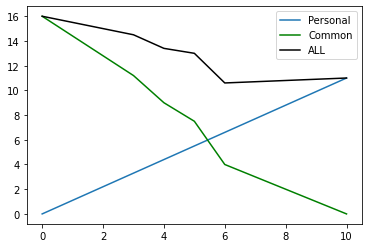

In [5]:
x = np.arange(11)

group = 10  # 多少个人参加游戏？

personal_interests = np.array([personality(i) for i in x])
common_interests = np.array([common(group, group*i)[1] for i in 10-x])
personal_interests
common_interests
all_interests = personal_interests + common_interests

plt.plot(personal_interests, label="Personal")
plt.plot(common_interests, color="green", label="Common")
plt.plot(all_interests, color='black', label="ALL")
plt.legend()
plt.show();